<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

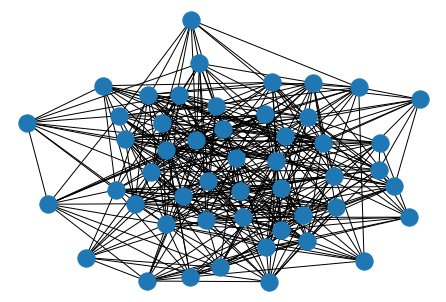

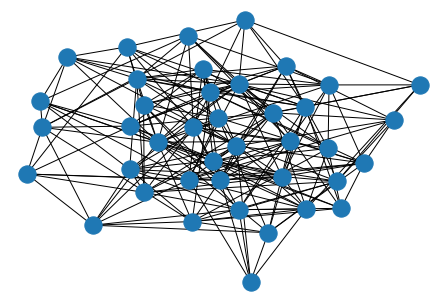

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [0 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 0]]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9811, 9610, 9336, 9083, 8867, 8739, 8632, 8544, 8463, 8377, 8283, 8203, 8152, 8114, 8083, 8050, 8024, 8004, 7990, 7973, 7951, 7932, 7924, 7917, 7914, 7911, 7909, 7908, 7907, 7905, 7896, 7890, 7886, 7884, 7883, 7883, 7883, 7883, 7883]
[189, 390, 664, 917, 944, 871, 704, 539, 404, 362, 349, 341, 311, 263, 200, 153, 128, 110, 93, 77, 73, 72, 66, 56, 37, 21, 15, 9, 7, 6, 13, 18, 21, 21, 13, 7, 3, 1, 0]
[0, 0, 0, 0, 189, 390, 664, 917, 1133, 1261, 1368, 1456, 1537, 1623, 1717, 1797, 1848, 1886, 1917, 1950, 1976, 1996, 2010, 2027, 2049, 2068, 2076, 2083, 2086, 2089, 2091, 2092, 2093, 2095, 2104, 2110, 2114, 2116, 2117]
[0.0, 16.0, 9.0, 6.5, 6.25, 8.125, 13.0625, 17.53125, 28.765625, 31.3828125, 23.69140625, 20.845703125, 17.4228515625, 15.71142578125, 11.855712890625, 8.9278564453125, 9.46392822265625, 8.731964111328125, 8.365982055664062, 5.182991027832031, 3.5914955139160156, 2.795747756958008, 2.397873878479004, 1.198936939239502, 0.599468469619751, 0.2997342348098755, 1.1498671174049377

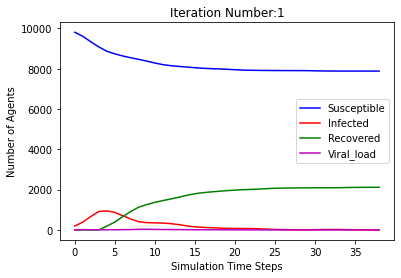

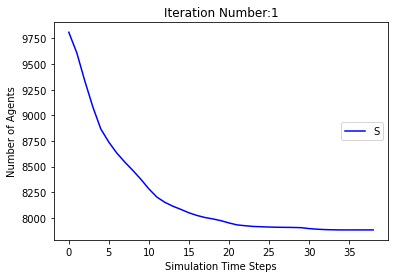

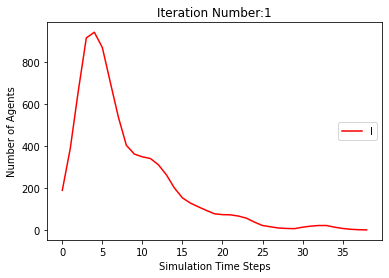

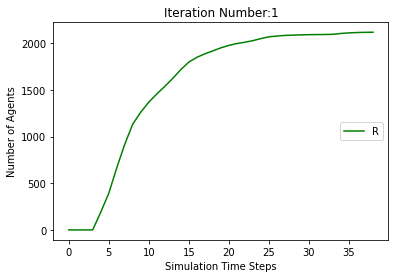

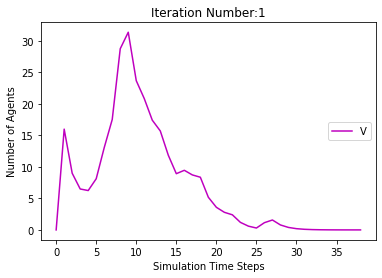

[9811, 9613, 9368, 9126, 8924, 8746, 8637, 8548, 8467, 8389, 8300, 8222, 8153, 8085, 8038, 8013, 8002, 7986, 7962, 7949, 7939, 7929, 7923, 7919, 7916, 7915, 7915, 7914, 7913, 7907, 7904, 7901, 7900, 7900, 7900, 7900, 7900]
[189, 387, 632, 874, 887, 867, 731, 578, 457, 357, 337, 326, 314, 304, 262, 209, 151, 99, 76, 64, 63, 57, 39, 30, 23, 14, 8, 5, 3, 8, 11, 13, 13, 7, 4, 1, 0]
[0, 0, 0, 0, 189, 387, 632, 874, 1076, 1254, 1363, 1452, 1533, 1611, 1700, 1778, 1847, 1915, 1962, 1987, 1998, 2014, 2038, 2051, 2061, 2071, 2077, 2081, 2084, 2085, 2085, 2086, 2087, 2093, 2096, 2099, 2100]
[0.0, 17.0, 9.5, 6.75, 9.375, 11.6875, 15.84375, 18.921875, 23.4609375, 25.73046875, 27.865234375, 22.9326171875, 18.46630859375, 18.233154296875, 17.1165771484375, 11.55828857421875, 6.779144287109375, 6.3895721435546875, 4.194786071777344, 3.097393035888672, 1.548696517944336, 0.774348258972168, 1.387174129486084, 0.693587064743042, 1.346793532371521, 0.6733967661857605, 0.33669838309288025, 0.1683491915464

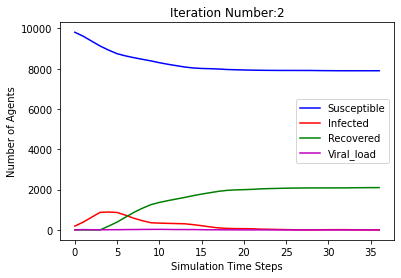

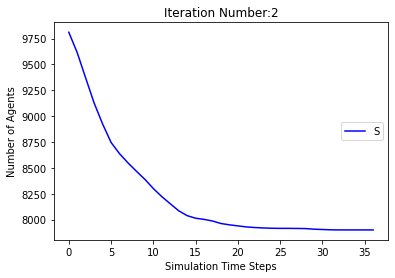

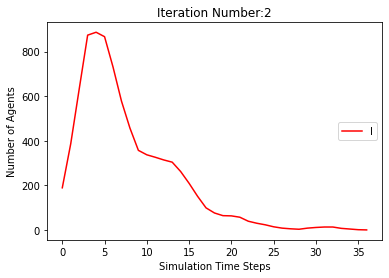

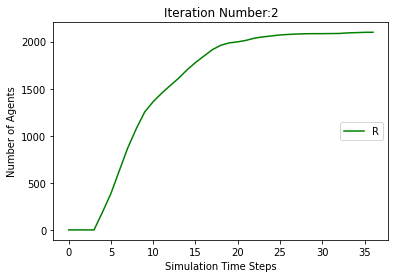

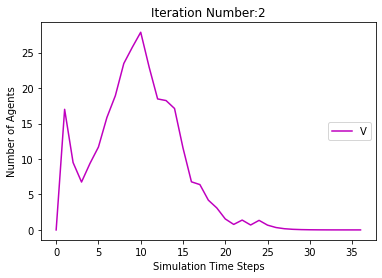

[9811, 9617, 9343, 9116, 8889, 8740, 8595, 8489, 8414, 8339, 8247, 8172, 8121, 8092, 8064, 8031, 7999, 7973, 7953, 7935, 7918, 7899, 7886, 7877, 7869, 7864, 7861, 7858, 7857, 7856, 7856, 7856, 7856, 7856, 7856, 7856, 7856]
[189, 383, 657, 884, 922, 877, 748, 627, 475, 401, 348, 317, 293, 247, 183, 141, 122, 119, 111, 96, 81, 74, 67, 58, 49, 35, 25, 19, 12, 8, 5, 2, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 189, 383, 657, 884, 1111, 1260, 1405, 1511, 1586, 1661, 1753, 1828, 1879, 1908, 1936, 1969, 2001, 2027, 2047, 2065, 2082, 2101, 2114, 2123, 2131, 2136, 2139, 2142, 2143, 2144, 2144, 2144, 2144]
[0.0, 16.0, 10.0, 6.0, 10.0, 13.0, 13.5, 20.75, 25.375, 26.6875, 26.34375, 19.171875, 12.5859375, 12.29296875, 10.146484375, 9.0732421875, 7.53662109375, 5.768310546875, 5.8841552734375, 4.94207763671875, 2.471038818359375, 2.2355194091796875, 1.1177597045898438, 0.5588798522949219, 0.27943992614746094, 0.13971996307373047, 0.06985998153686523, 0.03492999076843262, 0.01746499538421631, 1.0087324976921082, 0

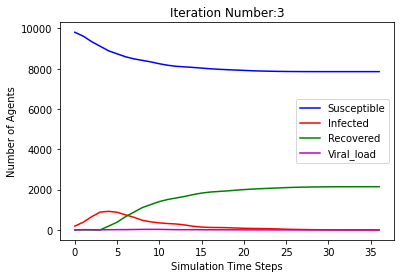

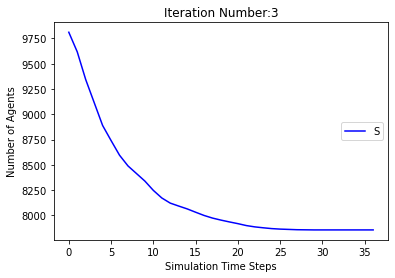

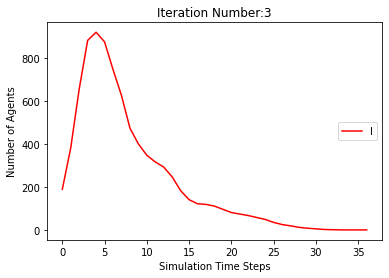

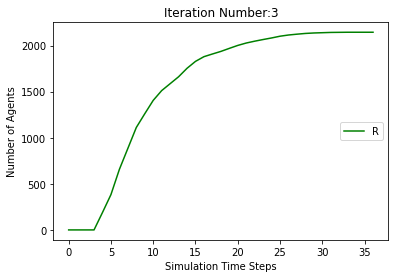

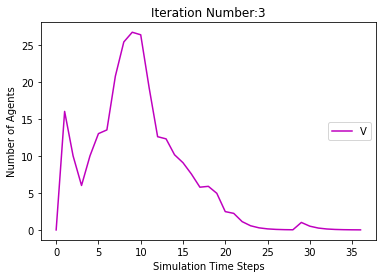

[9811, 9624, 9389, 9142, 8928, 8770, 8647, 8549, 8445, 8356, 8264, 8187, 8099, 8031, 7979, 7943, 7919, 7895, 7881, 7867, 7862, 7858, 7855, 7855, 7854, 7854, 7854, 7854, 7854]
[189, 376, 611, 858, 883, 854, 742, 593, 483, 414, 383, 362, 346, 325, 285, 244, 180, 136, 98, 76, 57, 37, 26, 12, 8, 4, 1, 1, 0]
[0, 0, 0, 0, 189, 376, 611, 858, 1072, 1230, 1353, 1451, 1555, 1644, 1736, 1813, 1901, 1969, 2021, 2057, 2081, 2105, 2119, 2133, 2138, 2142, 2145, 2145, 2146]
[0.0, 17.0, 8.5, 5.25, 5.625, 11.8125, 14.90625, 17.453125, 23.7265625, 28.86328125, 27.431640625, 24.7158203125, 21.35791015625, 22.678955078125, 14.3394775390625, 10.16973876953125, 12.084869384765625, 10.042434692382812, 5.021217346191406, 2.510608673095703, 1.2553043365478516, 0.6276521682739258, 0.3138260841369629, 0.15691304206848145, 0.07845652103424072, 0.03922826051712036, 0.01961413025856018, 0.00980706512928009, 0.004903532564640045]
[[], [9811, 9610, 9336, 9083, 8867, 8739, 8632, 8544, 8463, 8377, 8283, 8203, 8152, 811

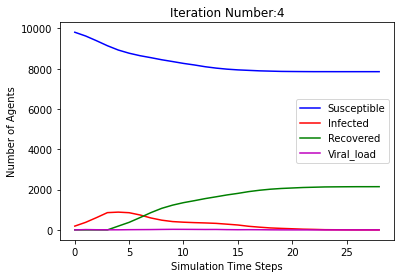

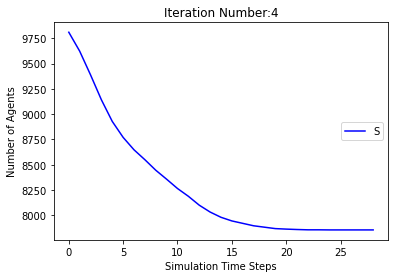

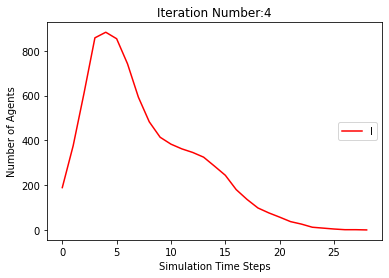

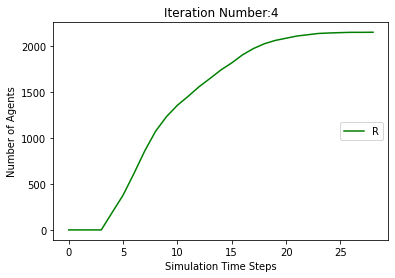

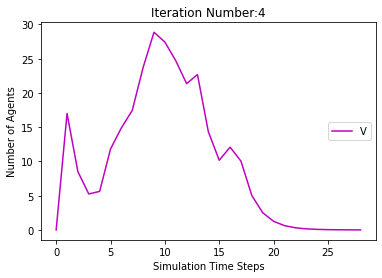

[9811, 9607, 9372, 9117, 8872, 8716, 8576, 8470, 8372, 8286, 8203, 8136, 8084, 8053, 8017, 7981, 7958, 7938, 7924, 7917, 7907, 7898, 7896, 7896, 7893, 7891, 7886, 7880, 7879, 7879, 7879, 7879, 7879]
[189, 393, 628, 883, 939, 891, 796, 647, 500, 430, 373, 334, 288, 233, 186, 155, 126, 115, 93, 64, 51, 40, 28, 21, 14, 7, 10, 16, 14, 12, 7, 1, 0]
[0, 0, 0, 0, 189, 393, 628, 883, 1128, 1284, 1424, 1530, 1628, 1714, 1797, 1864, 1916, 1947, 1983, 2019, 2042, 2062, 2076, 2083, 2093, 2102, 2104, 2104, 2107, 2109, 2114, 2120, 2121]
[0.0, 17.0, 12.5, 9.25, 10.625, 14.3125, 20.15625, 24.078125, 26.0390625, 21.01953125, 24.509765625, 23.2548828125, 18.62744140625, 14.313720703125, 10.1568603515625, 5.07843017578125, 4.539215087890625, 4.2696075439453125, 5.134803771972656, 4.567401885986328, 3.283700942993164, 2.641850471496582, 1.320925235748291, 0.6604626178741455, 1.3302313089370728, 0.6651156544685364, 0.3325578272342682, 0.1662789136171341, 0.08313945680856705, 0.041569728404283524, 0.0207848

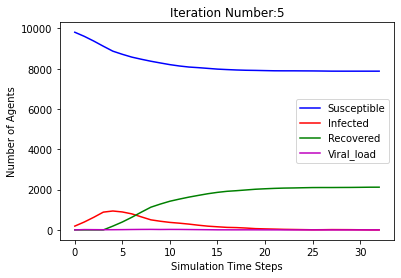

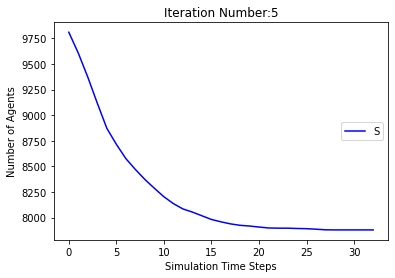

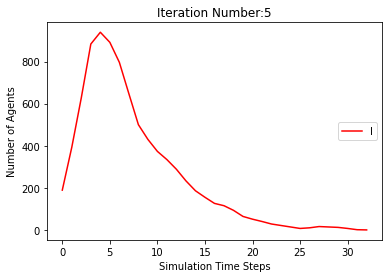

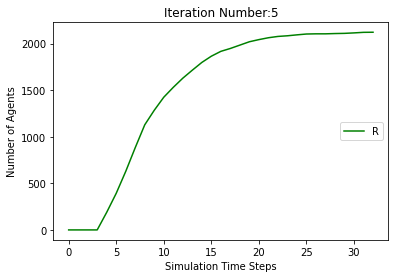

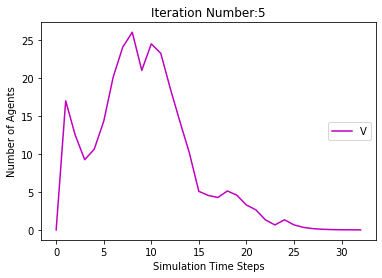

[9811, 9613, 9364, 9143, 8935, 8812, 8700, 8603, 8504, 8433, 8333, 8255, 8176, 8125, 8099, 8068, 8031, 8000, 7978, 7966, 7960, 7956, 7952, 7943, 7936, 7929, 7922, 7916, 7910, 7904, 7903, 7903, 7903, 7903, 7903]
[189, 387, 636, 857, 876, 801, 664, 540, 431, 379, 367, 348, 328, 308, 234, 187, 145, 125, 121, 102, 71, 44, 26, 23, 24, 27, 30, 27, 26, 25, 19, 13, 7, 1, 0]
[0, 0, 0, 0, 189, 387, 636, 857, 1065, 1188, 1300, 1397, 1496, 1567, 1667, 1745, 1824, 1875, 1901, 1932, 1969, 2000, 2022, 2034, 2040, 2044, 2048, 2057, 2064, 2071, 2078, 2084, 2090, 2096, 2097]
[0.0, 16.0, 12.0, 9.0, 6.5, 9.25, 10.625, 18.3125, 21.15625, 25.578125, 19.7890625, 19.89453125, 18.947265625, 14.4736328125, 14.23681640625, 17.118408203125, 14.5592041015625, 9.27960205078125, 6.639801025390625, 4.3199005126953125, 3.1599502563476562, 2.579975128173828, 2.289987564086914, 3.144993782043457, 1.5724968910217285, 0.7862484455108643, 0.39312422275543213, 0.19656211137771606, 0.09828105568885803, 0.049140527844429016, 

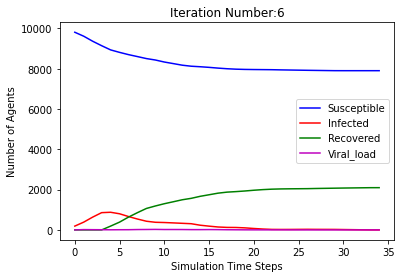

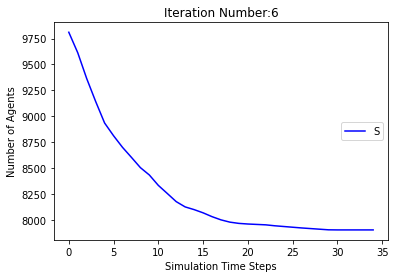

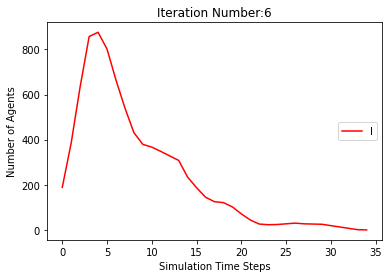

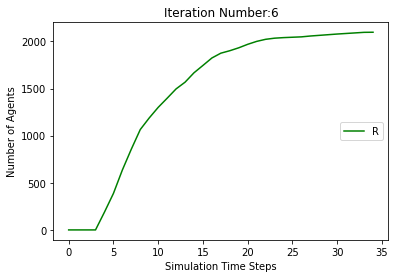

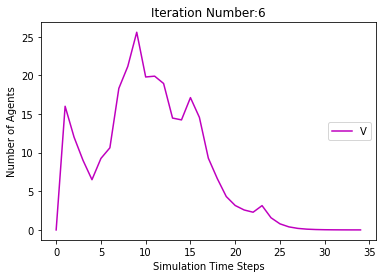

[9811, 9610, 9359, 9114, 8910, 8737, 8621, 8515, 8422, 8324, 8231, 8157, 8085, 8024, 7985, 7956, 7928, 7909, 7900, 7900, 7899, 7899, 7899, 7899, 7899, 7899, 7899, 7899, 7899]
[189, 390, 641, 886, 901, 873, 738, 599, 488, 413, 390, 358, 337, 300, 246, 201, 157, 115, 85, 56, 29, 10, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 189, 390, 641, 886, 1090, 1263, 1379, 1485, 1578, 1676, 1769, 1843, 1915, 1976, 2015, 2044, 2072, 2091, 2100, 2100, 2101, 2101, 2101, 2101, 2101]
[0.0, 17.0, 12.5, 10.25, 8.125, 10.0625, 23.03125, 25.515625, 28.7578125, 31.37890625, 26.689453125, 24.3447265625, 22.17236328125, 20.086181640625, 17.0430908203125, 12.52154541015625, 9.260772705078125, 5.6303863525390625, 2.8151931762695312, 2.4075965881347656, 2.203798294067383, 1.1018991470336914, 0.5509495735168457, 0.27547478675842285, 0.13773739337921143, 0.06886869668960571, 0.034434348344802856, 0.017217174172401428, 0.008608587086200714]
[[], [9811, 9610, 9336, 9083, 8867, 8739, 8632, 8544, 8463, 8377, 8283, 8203, 8152, 8

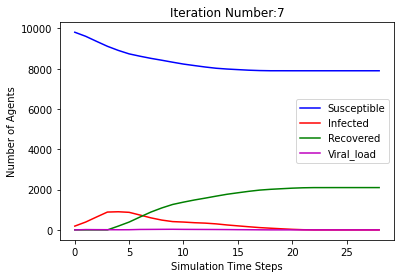

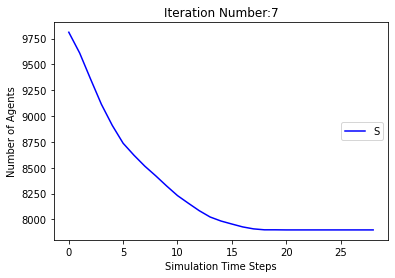

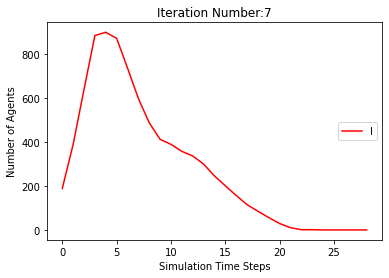

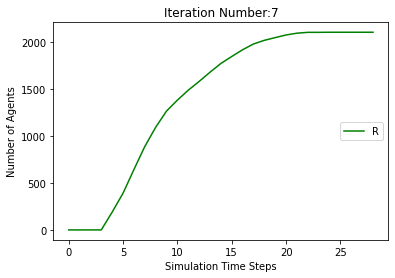

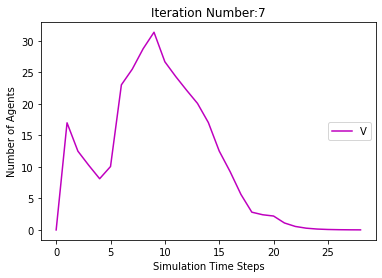

[9811, 9629, 9359, 9104, 8882, 8749, 8638, 8553, 8476, 8396, 8305, 8230, 8172, 8119, 8082, 8049, 8028, 8009, 7992, 7979, 7960, 7943, 7929, 7916, 7904, 7902, 7902, 7902, 7902, 7901, 7901, 7901, 7899, 7896, 7894, 7889, 7884, 7878, 7876, 7876, 7876, 7875, 7875, 7875, 7875, 7875, 7875, 7875, 7875, 7875]
[189, 371, 641, 896, 929, 880, 721, 551, 406, 353, 333, 323, 304, 277, 223, 181, 144, 110, 90, 70, 68, 66, 63, 63, 56, 41, 27, 14, 2, 1, 1, 1, 3, 5, 7, 12, 15, 18, 18, 13, 8, 3, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 189, 371, 641, 896, 1118, 1251, 1362, 1447, 1524, 1604, 1695, 1770, 1828, 1881, 1918, 1951, 1972, 1991, 2008, 2021, 2040, 2057, 2071, 2084, 2096, 2098, 2098, 2098, 2098, 2099, 2099, 2099, 2101, 2104, 2106, 2111, 2116, 2122, 2124, 2124, 2124, 2125, 2125, 2125, 2125, 2125]
[0.0, 16.0, 10.0, 8.0, 10.0, 11.0, 12.5, 21.25, 21.625, 25.8125, 22.90625, 21.453125, 16.7265625, 14.36328125, 11.181640625, 10.5908203125, 8.29541015625, 8.147705078125, 4.0738525390625, 4.03692626953125, 4.0184

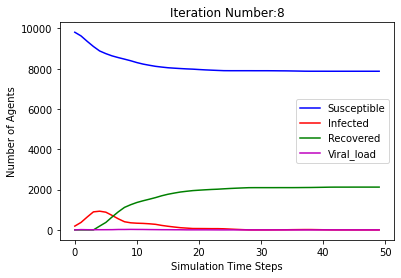

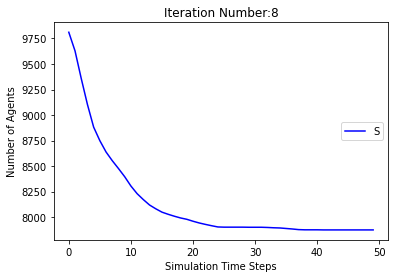

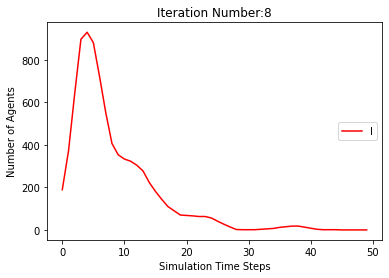

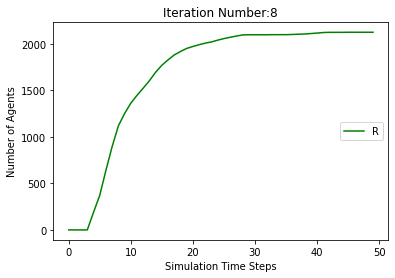

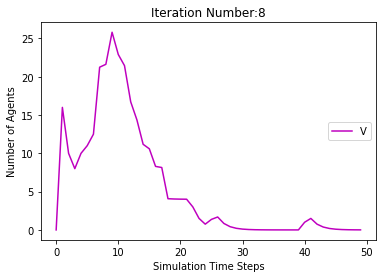

[9811, 9626, 9372, 9133, 8907, 8779, 8671, 8584, 8500, 8409, 8315, 8226, 8132, 8082, 8040, 8007, 7977, 7946, 7922, 7911, 7901, 7891, 7882, 7871, 7859, 7847, 7842, 7841, 7841, 7841, 7841, 7841]
[189, 374, 628, 867, 904, 847, 701, 549, 407, 370, 356, 358, 368, 327, 275, 219, 155, 136, 118, 96, 76, 55, 40, 40, 42, 44, 40, 30, 18, 6, 1, 0]
[0, 0, 0, 0, 189, 374, 628, 867, 1093, 1221, 1329, 1416, 1500, 1591, 1685, 1774, 1868, 1918, 1960, 1993, 2023, 2054, 2078, 2089, 2099, 2109, 2118, 2129, 2141, 2153, 2158, 2159]
[0.0, 17.0, 11.5, 6.75, 7.375, 12.6875, 12.34375, 22.171875, 24.0859375, 23.04296875, 25.521484375, 21.7607421875, 20.88037109375, 19.440185546875, 14.7200927734375, 12.36004638671875, 10.180023193359375, 7.0900115966796875, 4.545005798339844, 5.272502899169922, 2.636251449584961, 2.3181257247924805, 2.1590628623962402, 1.0795314311981201, 0.5397657155990601, 0.26988285779953003, 0.13494142889976501, 0.06747071444988251, 0.033735357224941254, 0.016867678612470627, 0.00843383930623

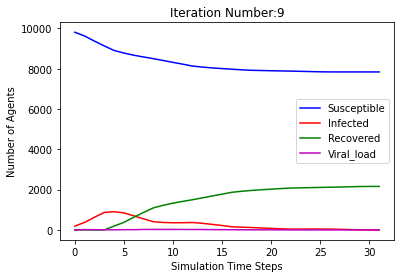

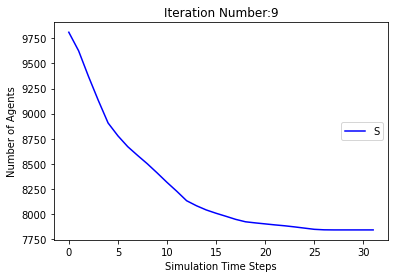

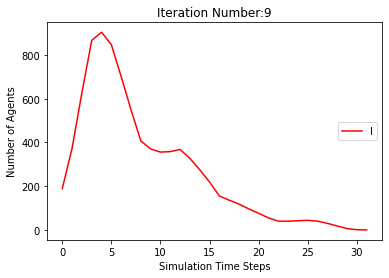

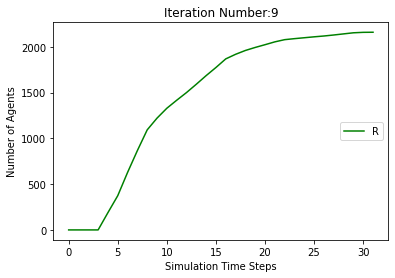

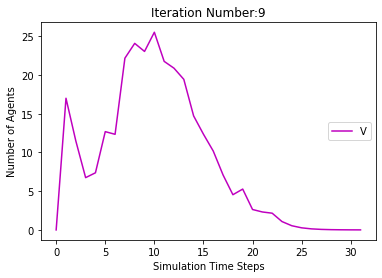

[9811, 9603, 9354, 9118, 8913, 8790, 8680, 8600, 8534, 8466, 8401, 8316, 8225, 8158, 8098, 8057, 8035, 8019, 8003, 7992, 7984, 7975, 7973, 7970, 7966, 7962, 7960, 7959, 7957, 7954, 7953, 7944, 7936, 7934, 7933, 7933, 7933, 7933, 7933, 7933, 7933, 7933, 7933, 7933, 7933]
[189, 397, 646, 882, 898, 813, 674, 518, 379, 324, 279, 284, 309, 308, 303, 259, 190, 139, 95, 65, 51, 44, 30, 22, 18, 13, 13, 11, 9, 8, 7, 15, 21, 20, 20, 11, 3, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 189, 397, 646, 882, 1087, 1210, 1320, 1400, 1466, 1534, 1599, 1684, 1775, 1842, 1902, 1943, 1965, 1981, 1997, 2008, 2016, 2025, 2027, 2030, 2034, 2038, 2040, 2041, 2043, 2046, 2047, 2056, 2064, 2066, 2067, 2067, 2067, 2067, 2067, 2067, 2067]
[0.0, 17.0, 10.5, 7.25, 9.625, 10.8125, 13.40625, 21.703125, 26.8515625, 26.42578125, 22.212890625, 17.1064453125, 20.55322265625, 16.276611328125, 11.1383056640625, 9.56915283203125, 6.784576416015625, 6.3922882080078125, 5.196144104003906, 3.598072052001953, 4.799036026000977, 4.39951

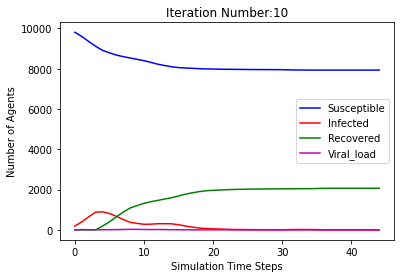

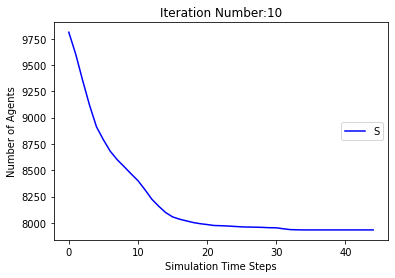

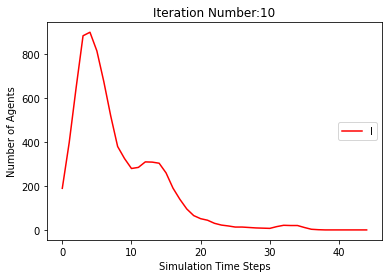

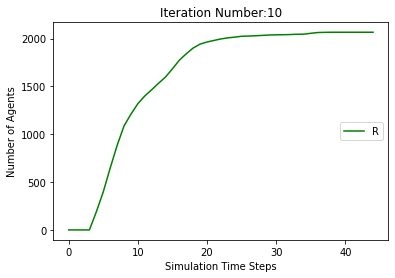

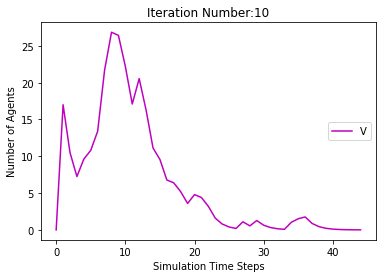

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

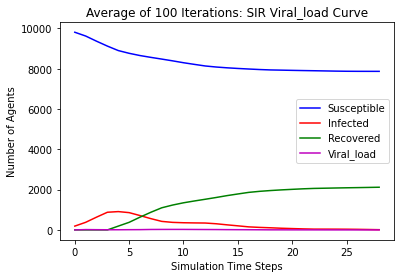

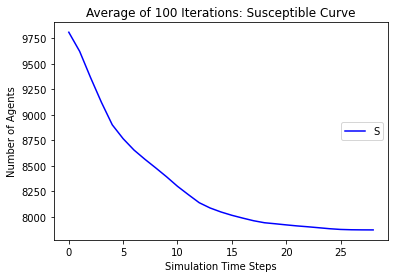

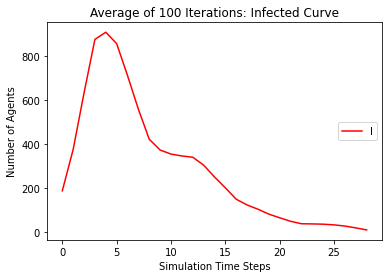

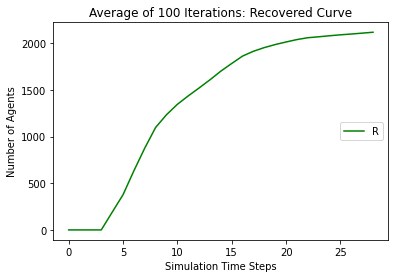

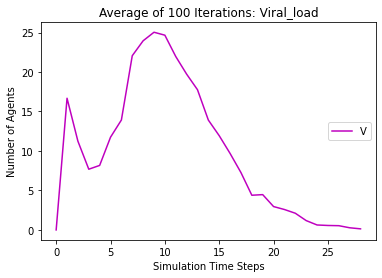

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Viral_load')
plt.ylabel('Number of Agents')
plt.legend(("Viral_load"),loc='center right')
plt.show()  


  
